In [1]:
#import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

In [2]:
from scipy.io import loadmat

# Load the mat file
mat_data = loadmat(r'C:\Users\Amesh\Downloads\Compressed\Artificial Neural Network\ANN_BCI_dataset.mat')

# Print the keys in the loaded mat file
print(mat_data.keys())


dict_keys(['__header__', '__version__', '__globals__', 'X'])


In [3]:
from scipy.io import loadmat

# Load the mat file
mat_data = loadmat(r'C:\Users\Amesh\Downloads\Compressed\Artificial Neural Network\ANN_BCI_dataset.mat')

# Access the variables in the mat file
BCI6_50 = mat_data['X']

x = BCI6_50.T


In [4]:
# Define output matrix (overlap)
a = 2
f5 = np.concatenate([np.ones(25 * a), np.zeros(75 * a)])
f6 = np.concatenate([np.zeros(25 * a), np.ones(25 * a), np.zeros(50 * a)])
f7 = np.concatenate([np.zeros(50 * a), np.ones(25 * a), np.zeros(25 * a)])
f8 = np.concatenate([np.zeros(75 * a), np.ones(25 * a)])

Y = np.vstack([f5, f6, f7, f8]).T

In [5]:
print(x.shape)
print(Y.shape)

(200, 48)
(200, 4)


In [6]:

# Create an array of natural numbers from 0 to 47
x_hat = np.linspace(0, 47, 48, dtype=int)

# Display the array
print(x_hat)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]


In [7]:
Y[1][1]

0.0

C:\Users\Amesh\AppData\Local\Temp\ipykernel_12460\3212415251.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(14,4))


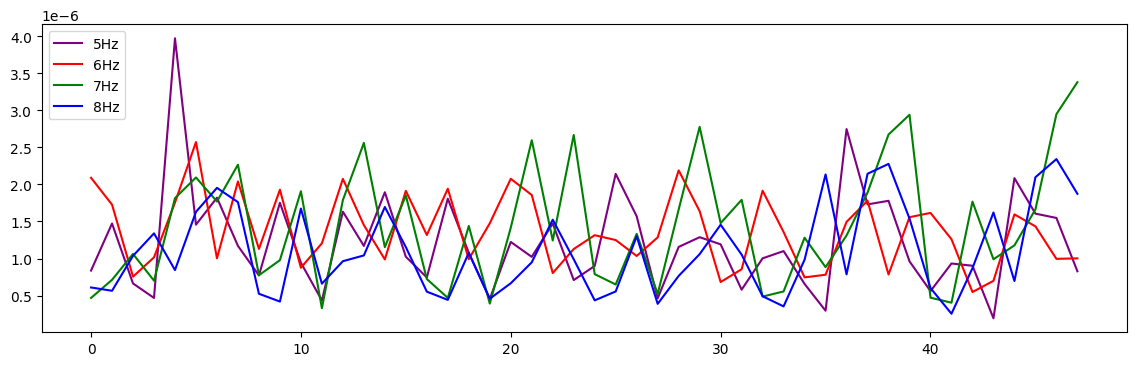

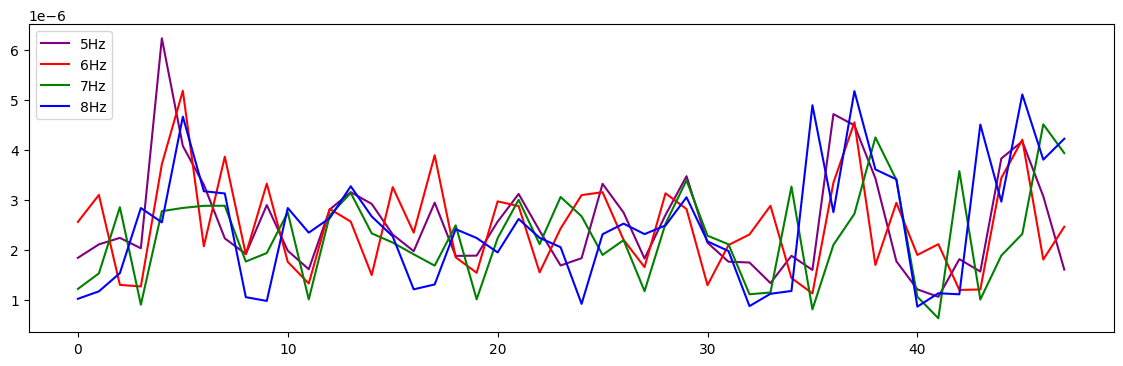

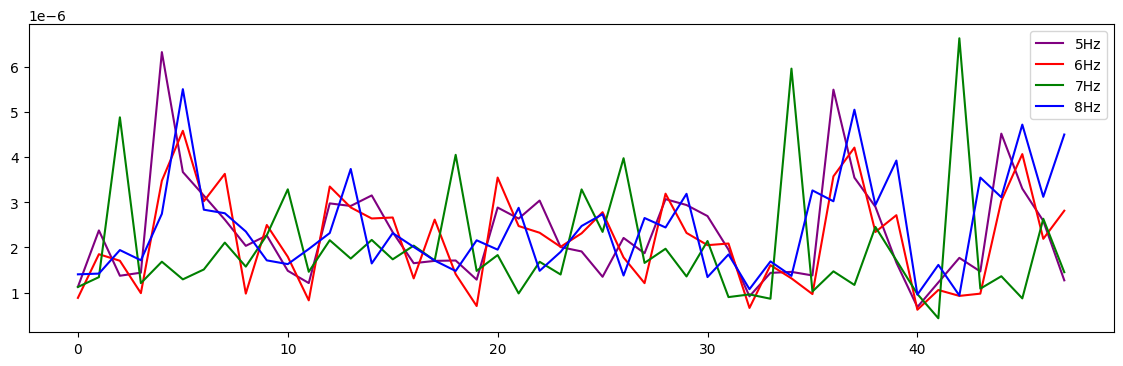

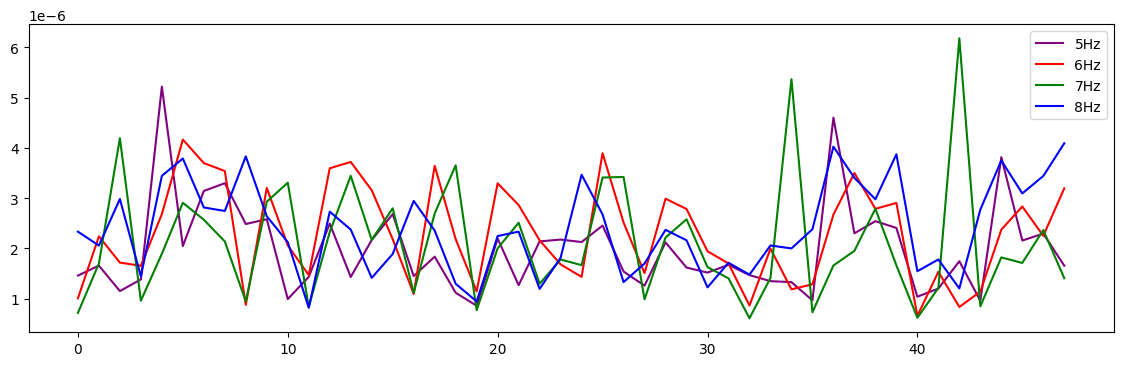

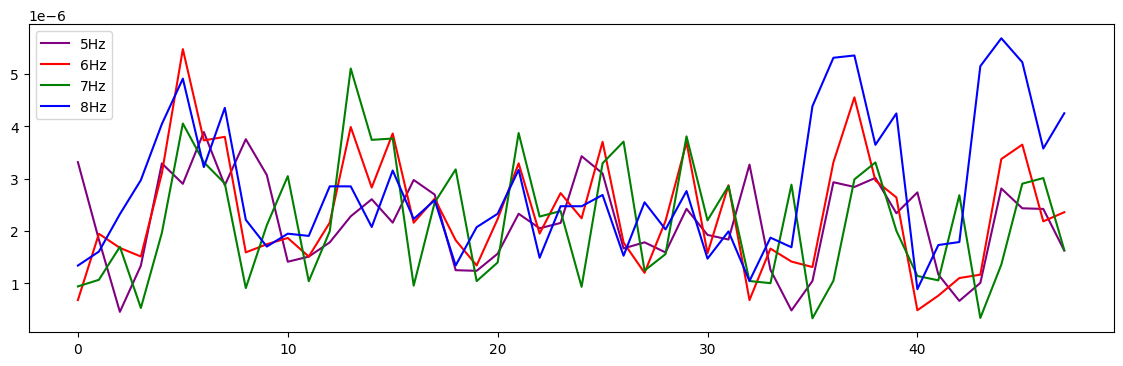

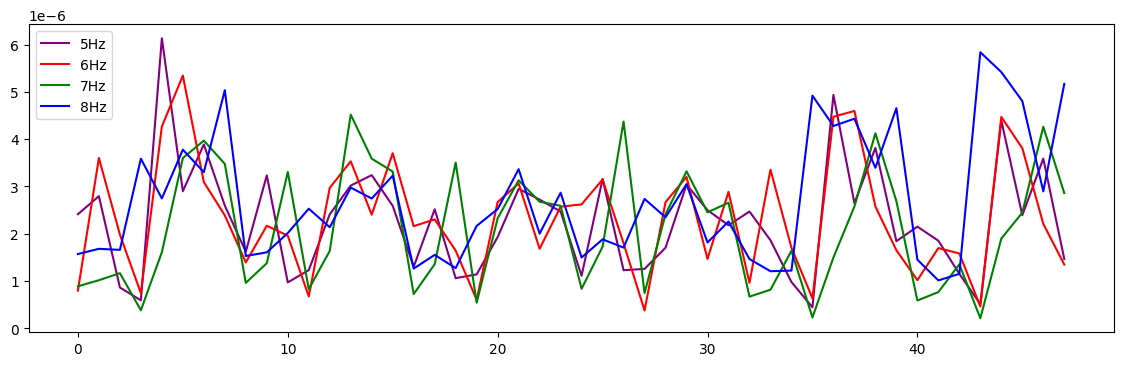

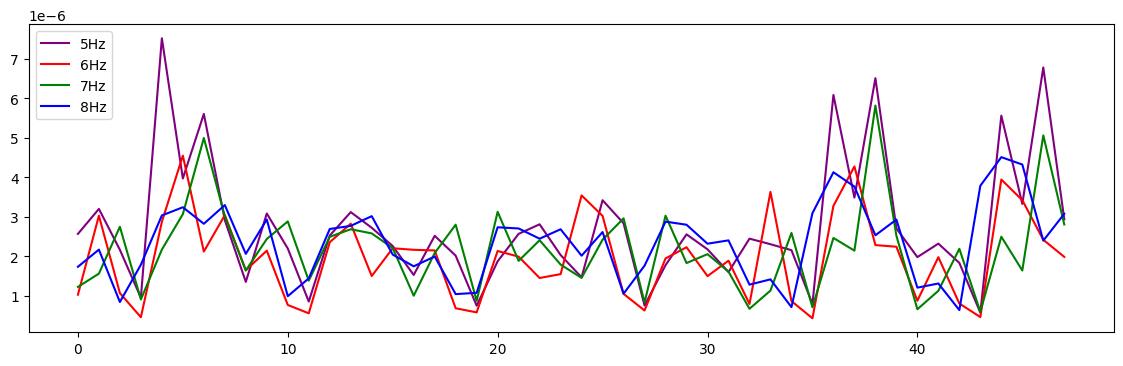

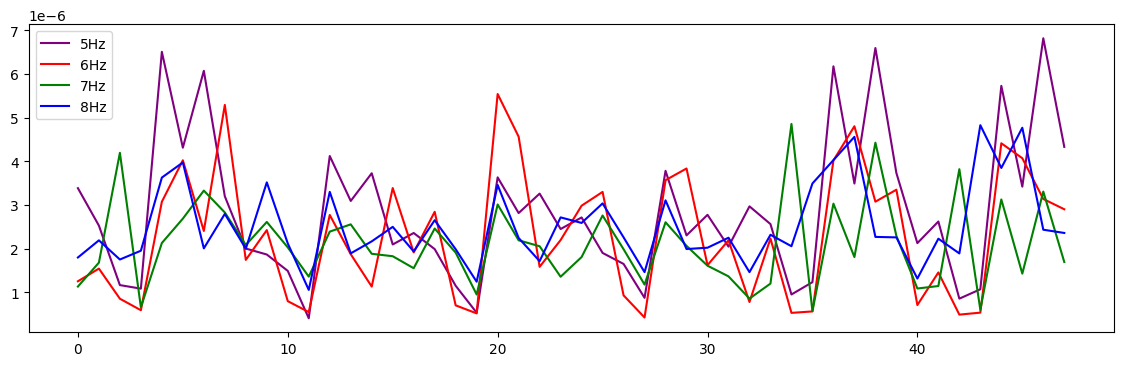

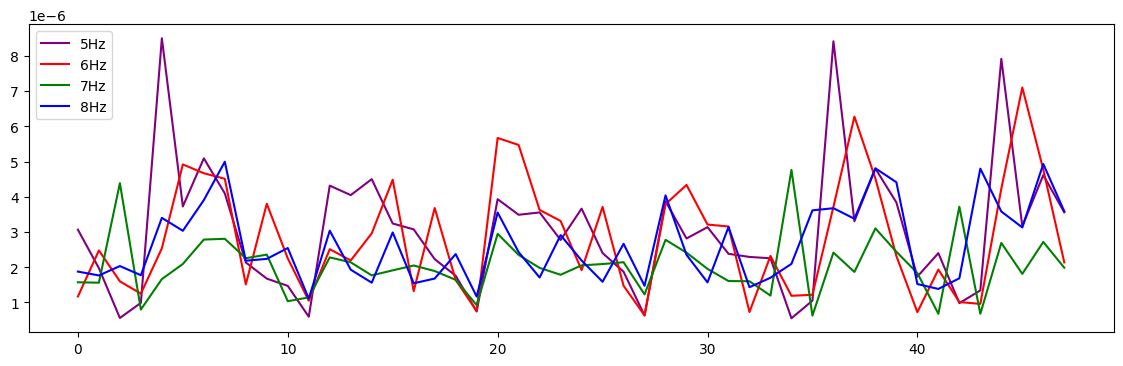

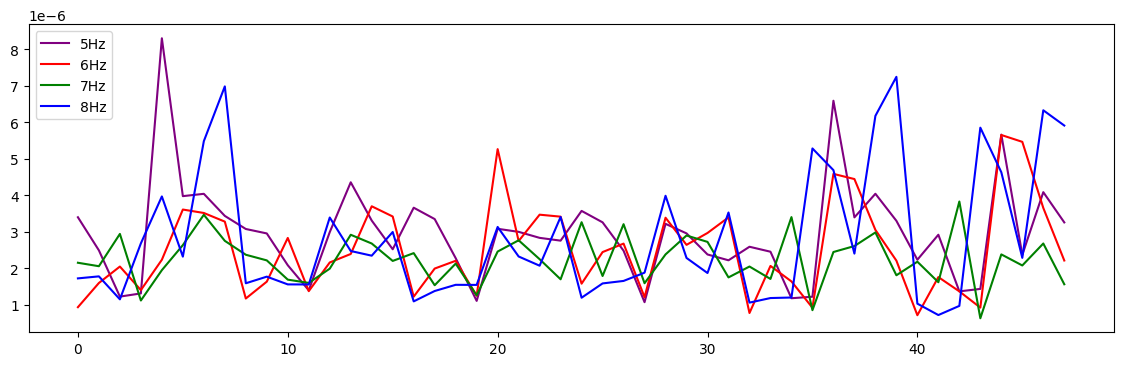

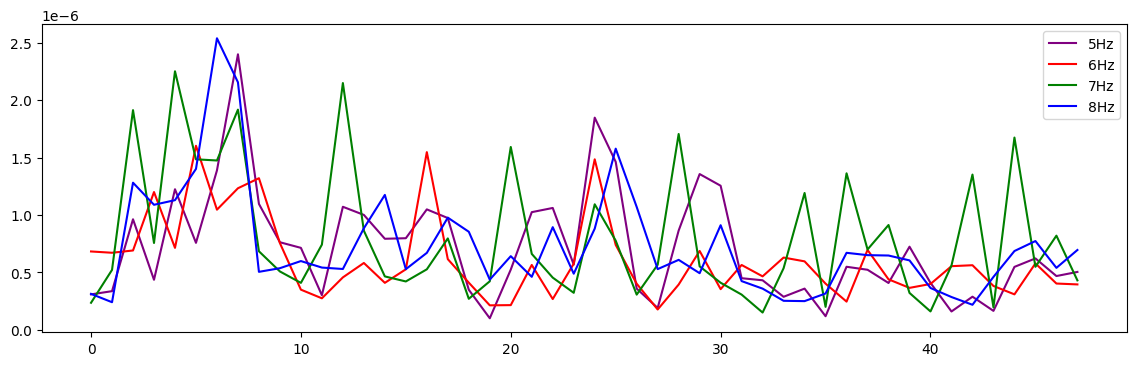

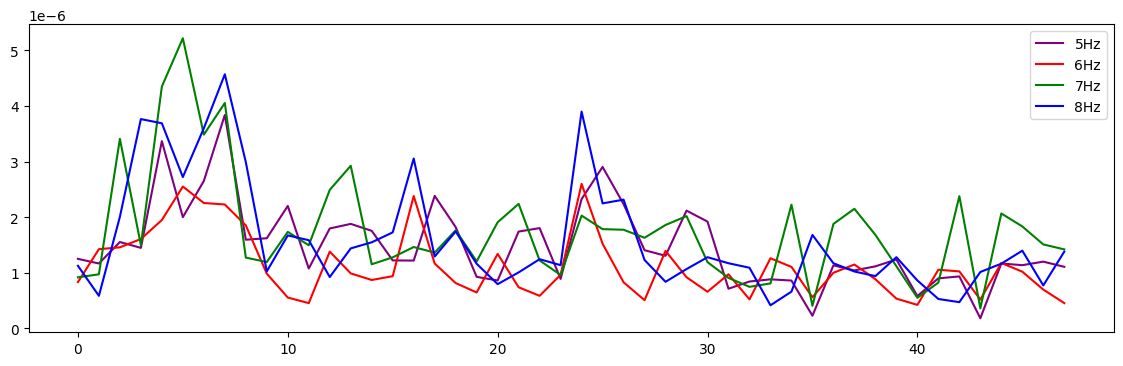

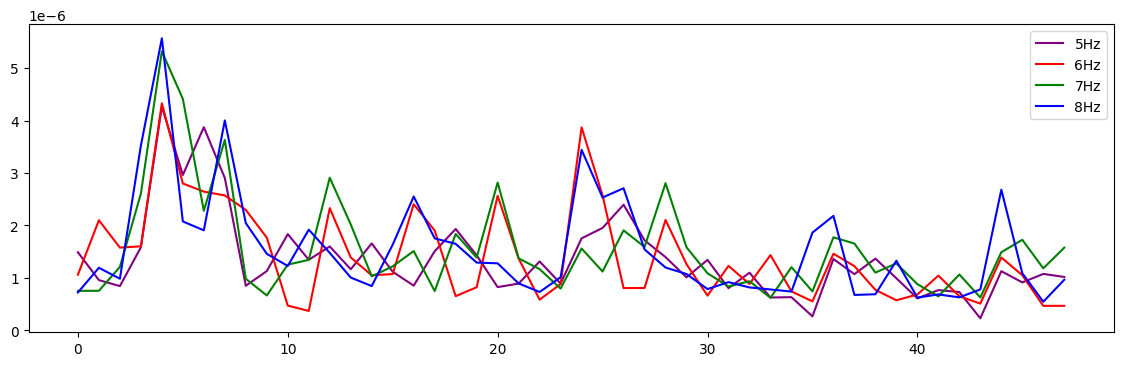

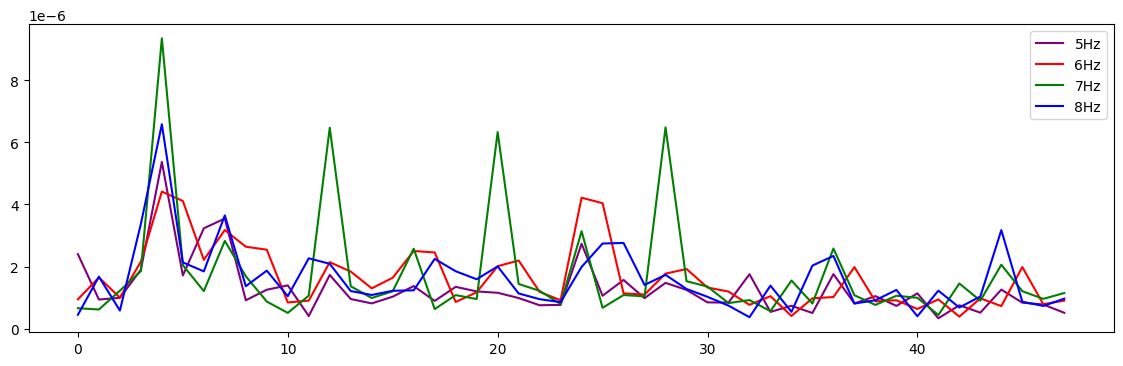

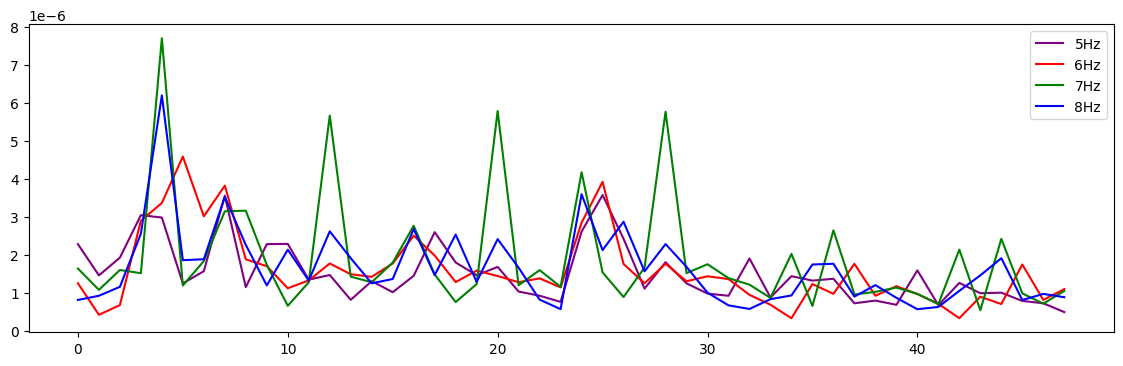

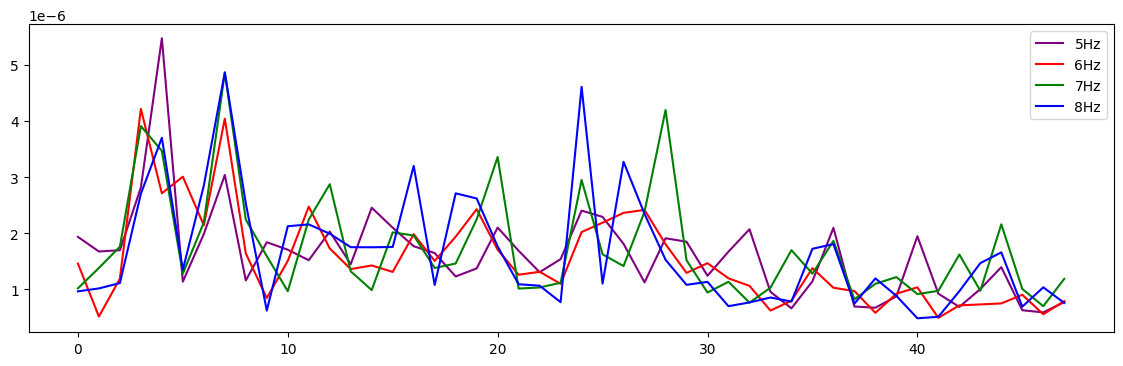

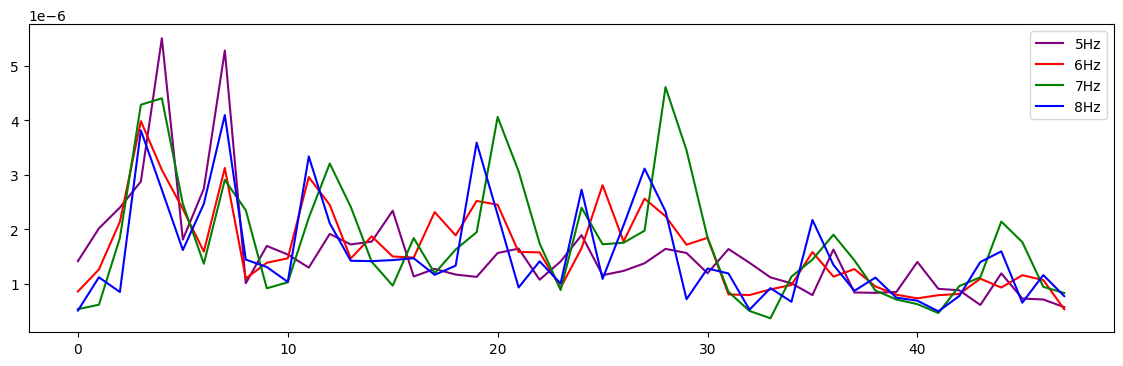

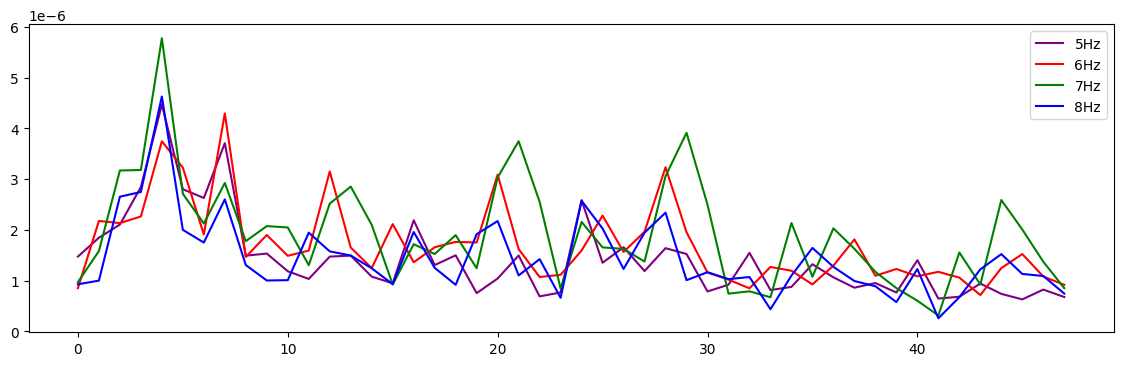

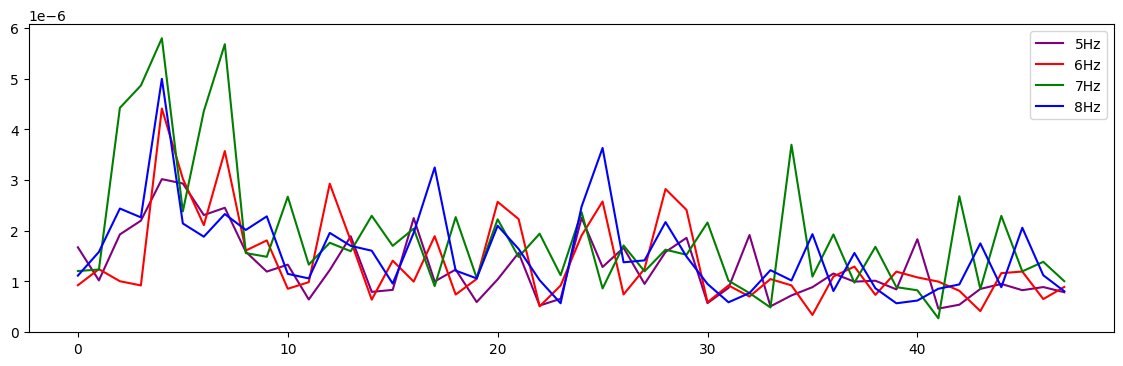

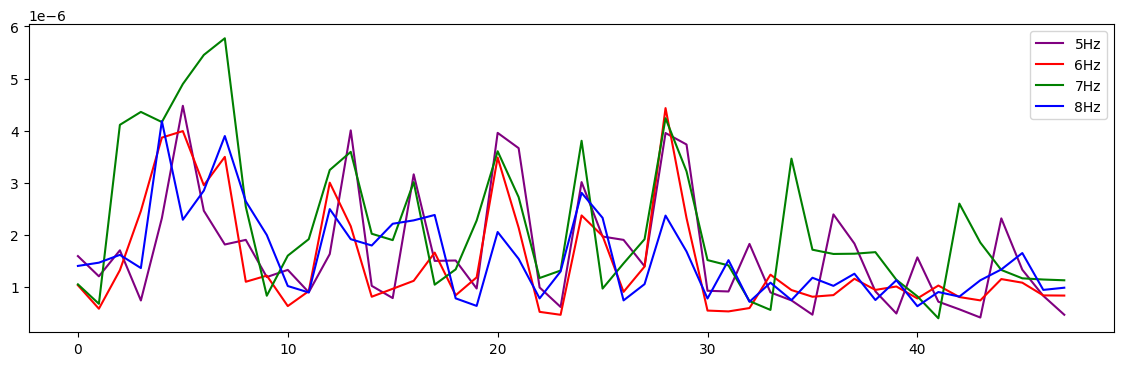

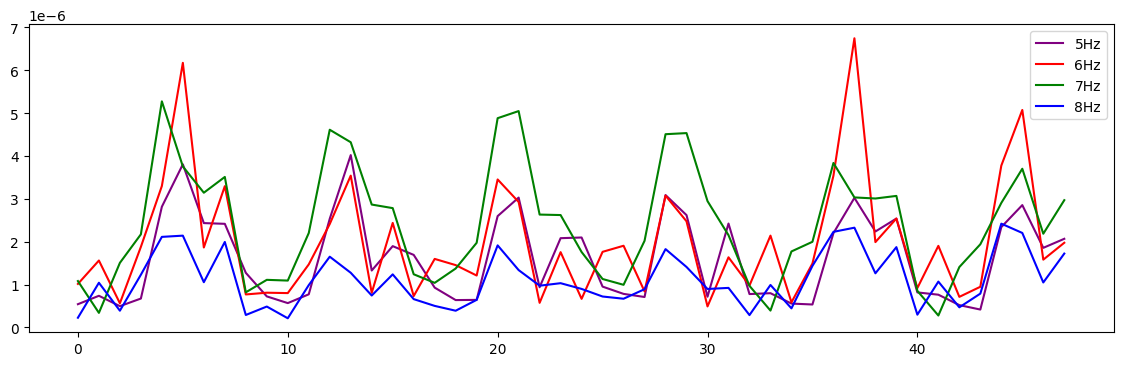

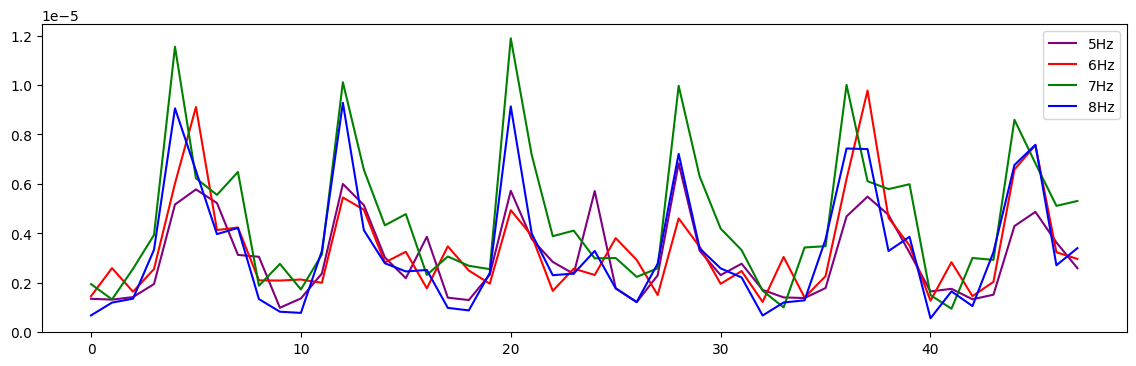

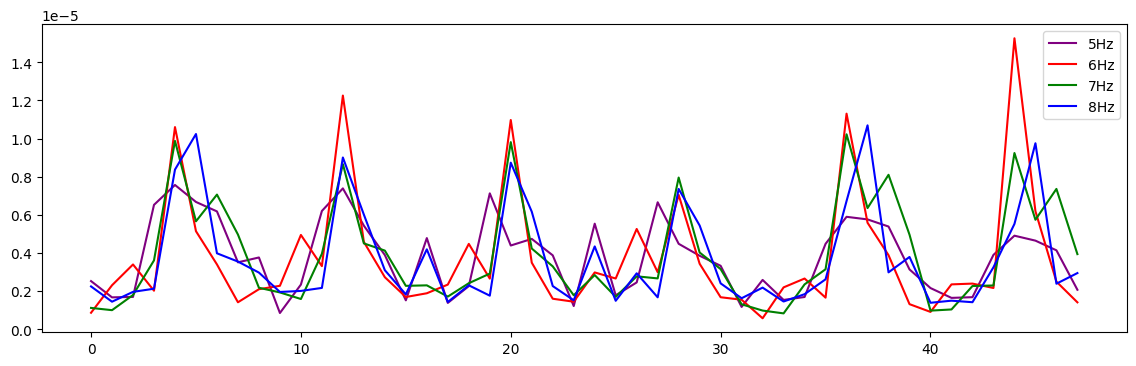

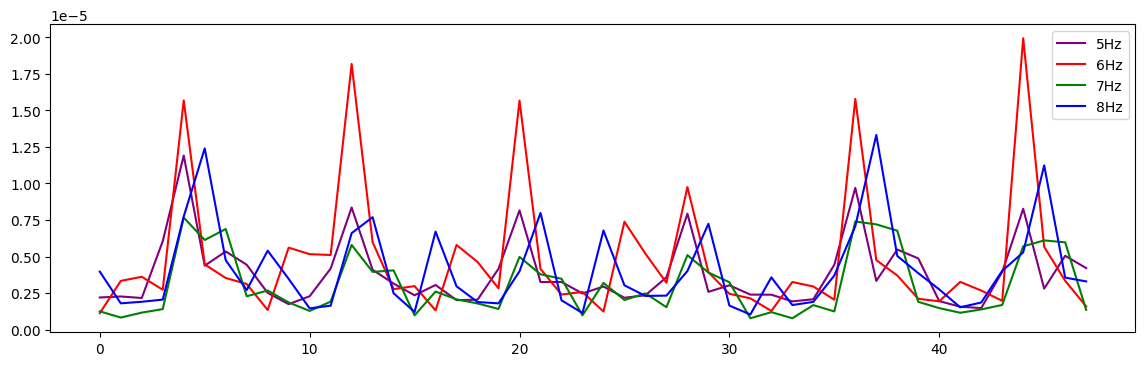

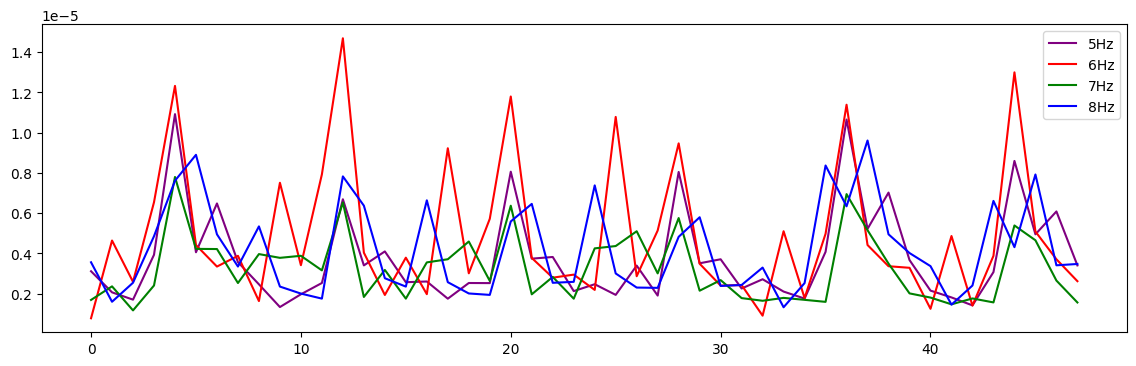

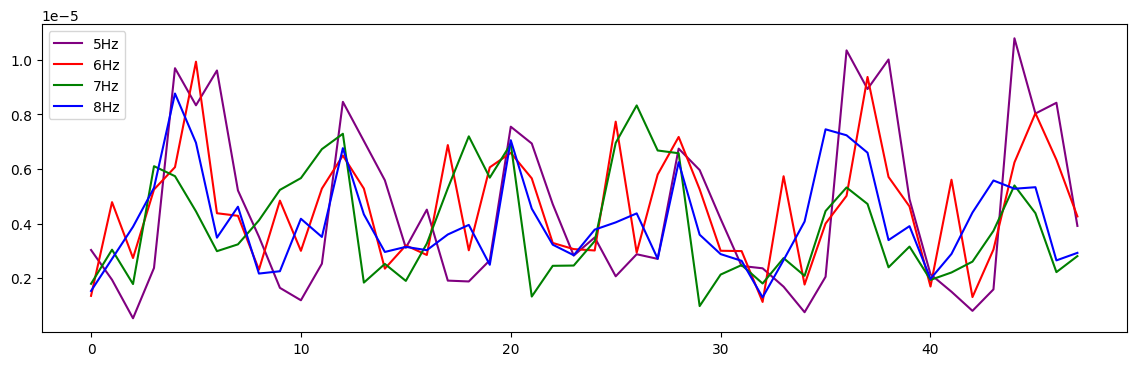

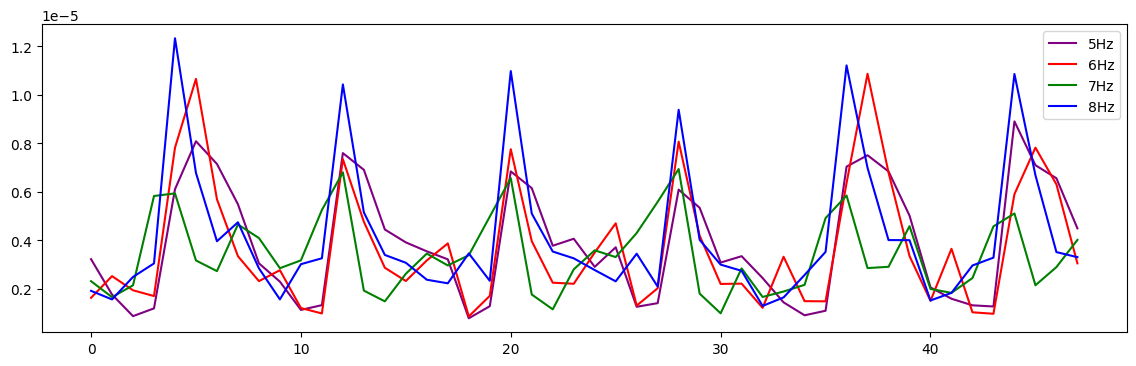

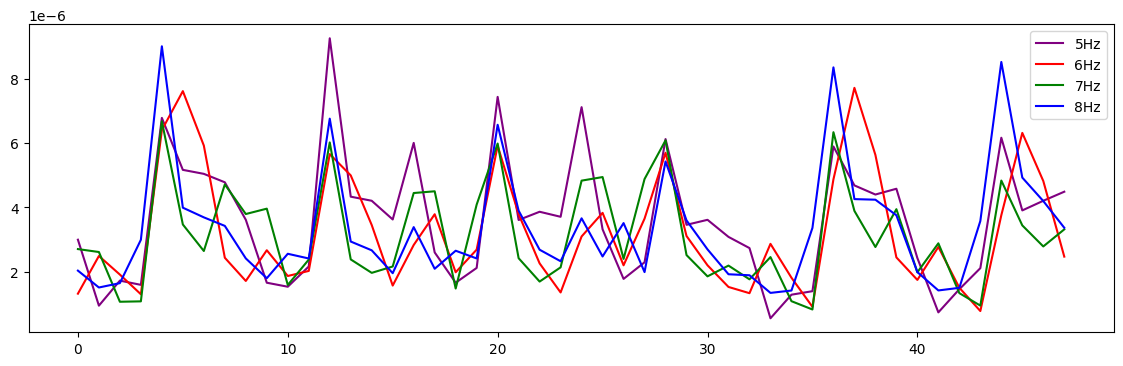

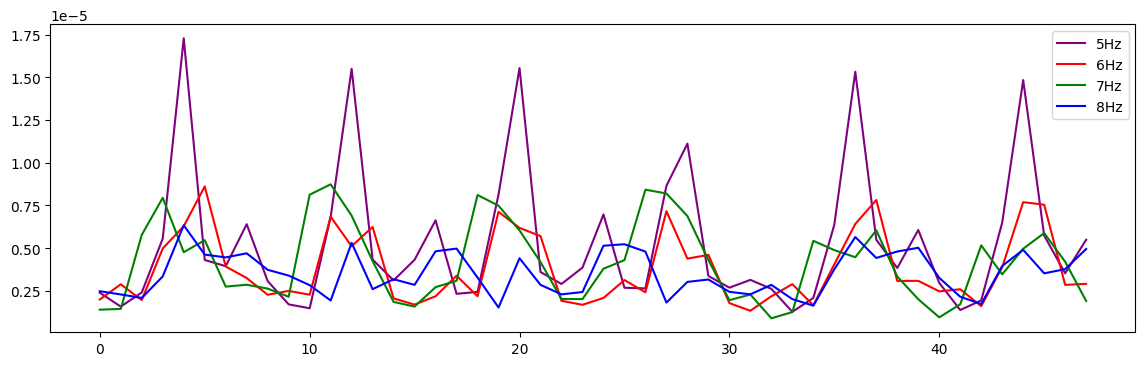

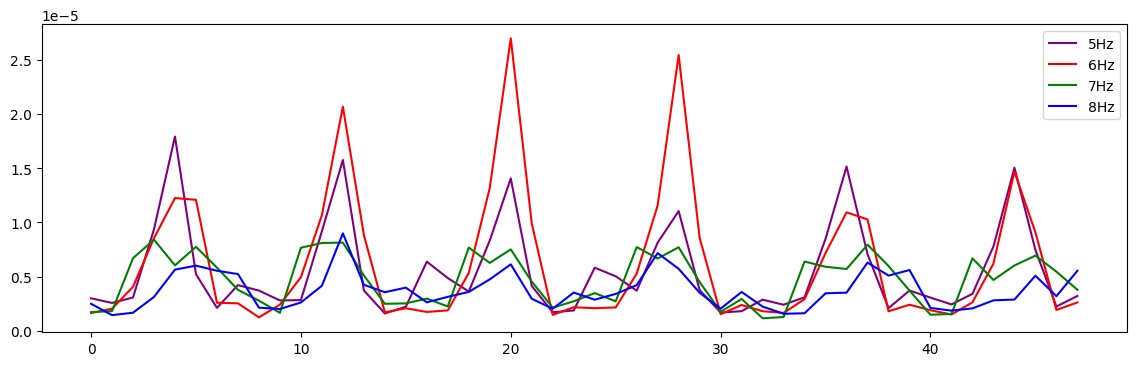

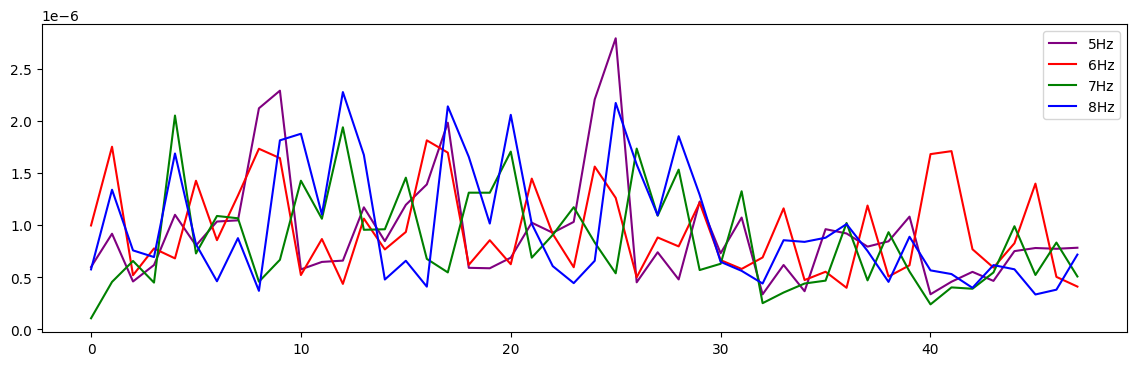

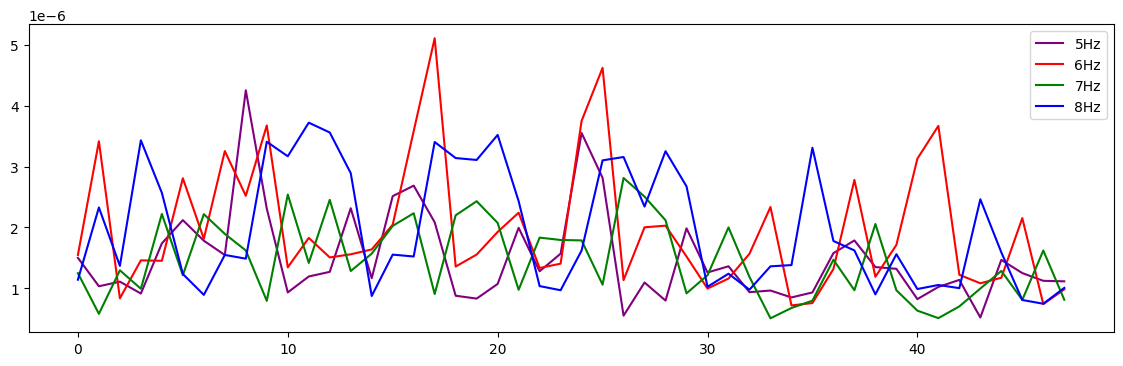

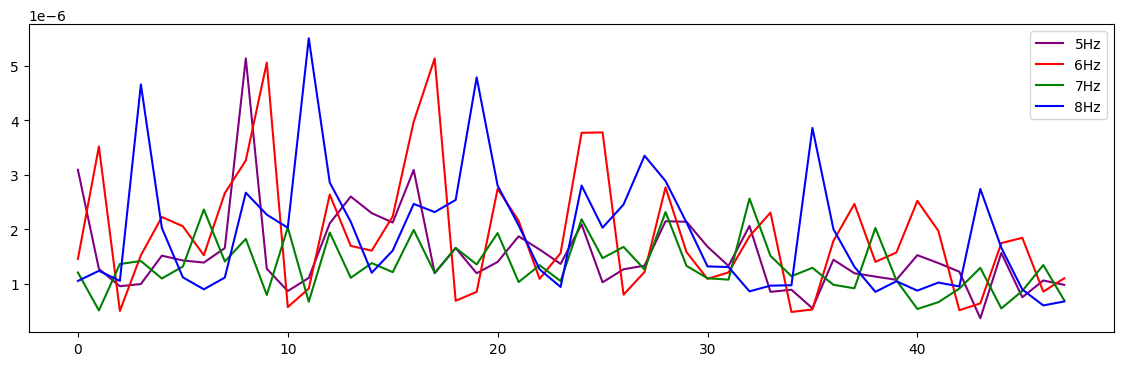

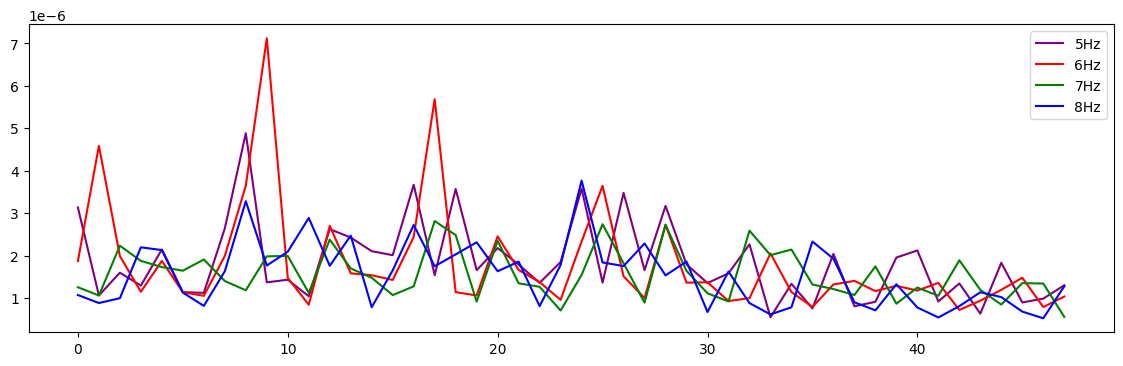

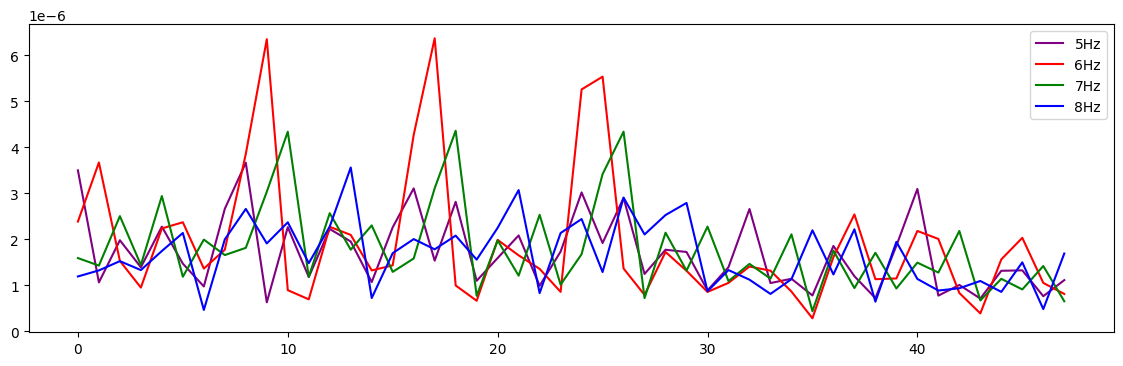

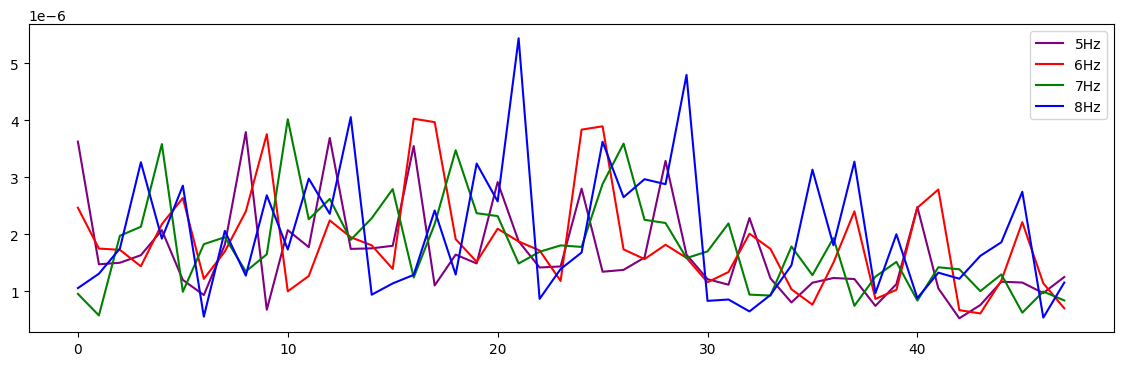

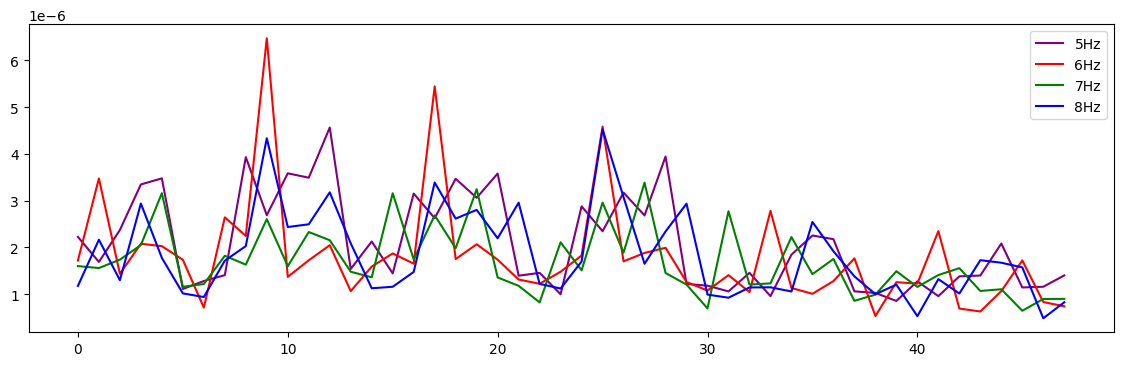

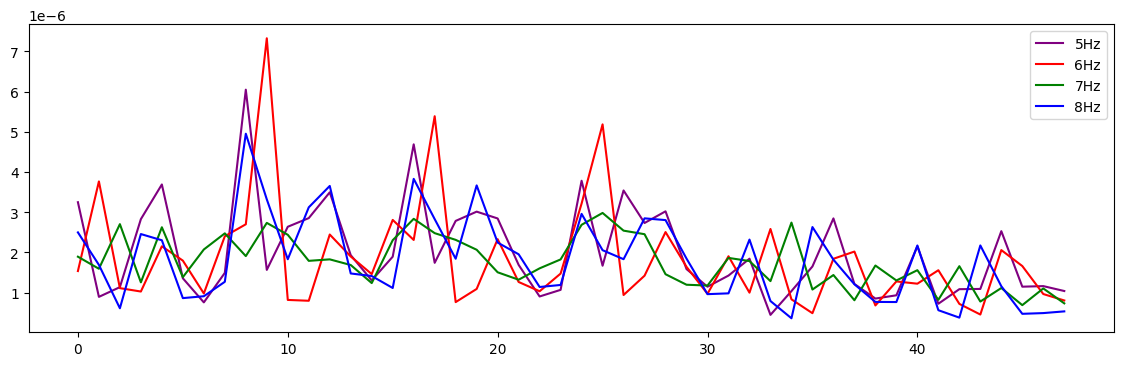

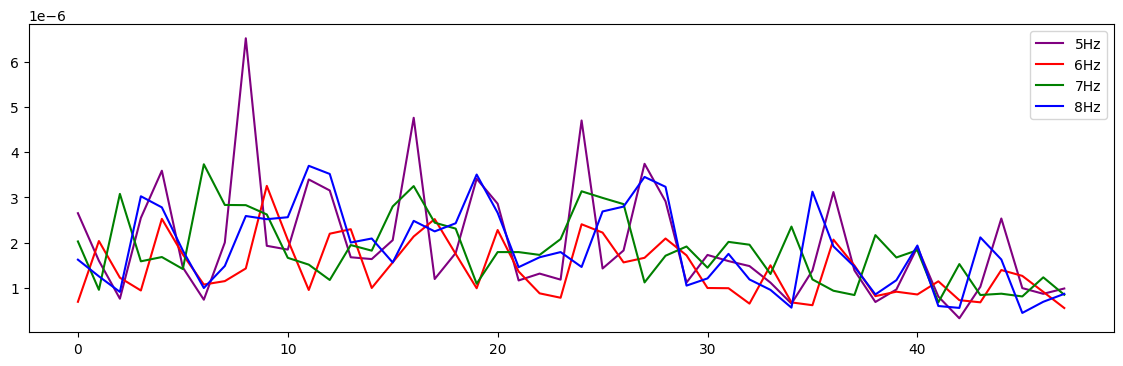

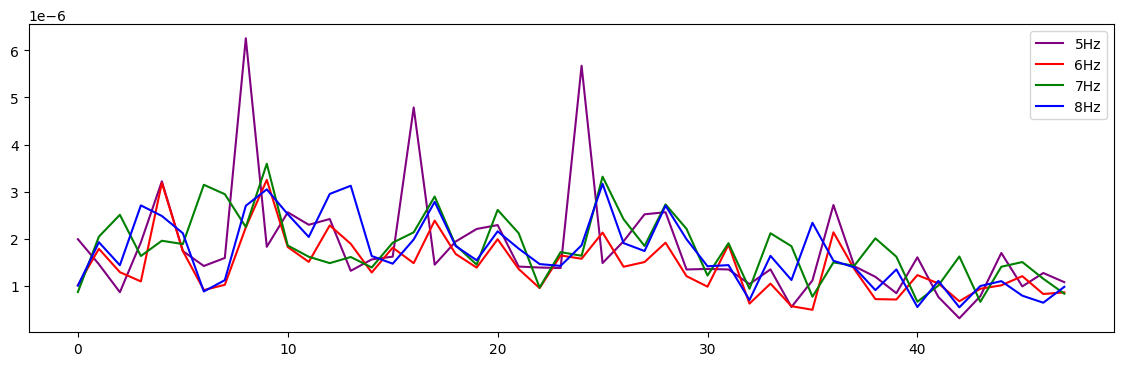

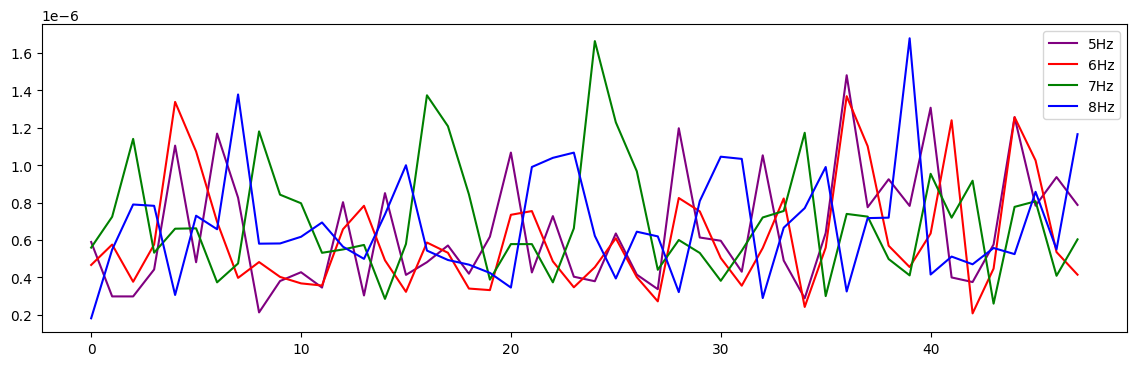

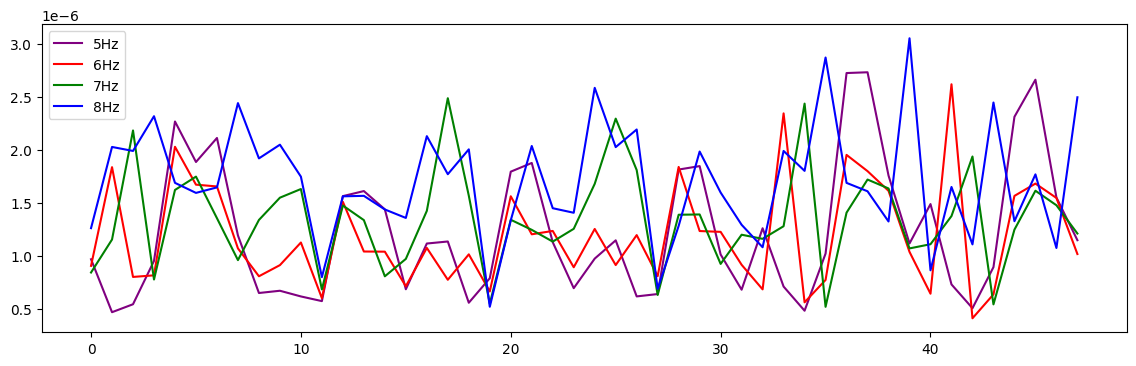

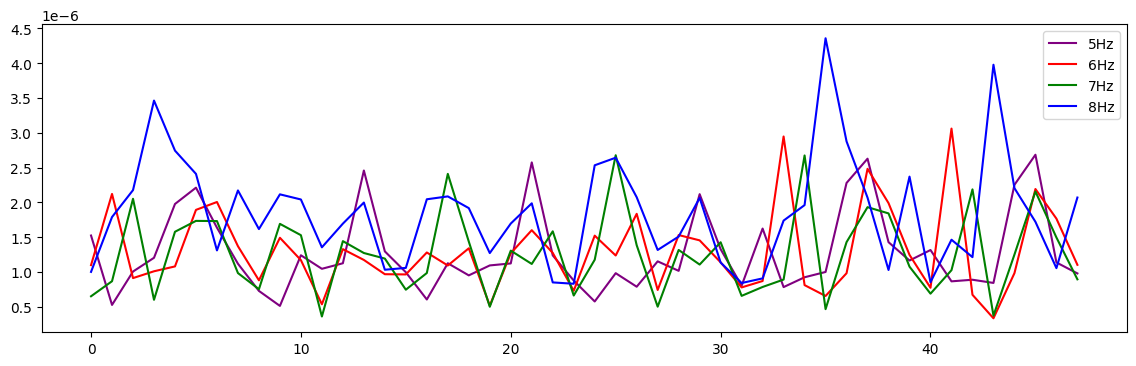

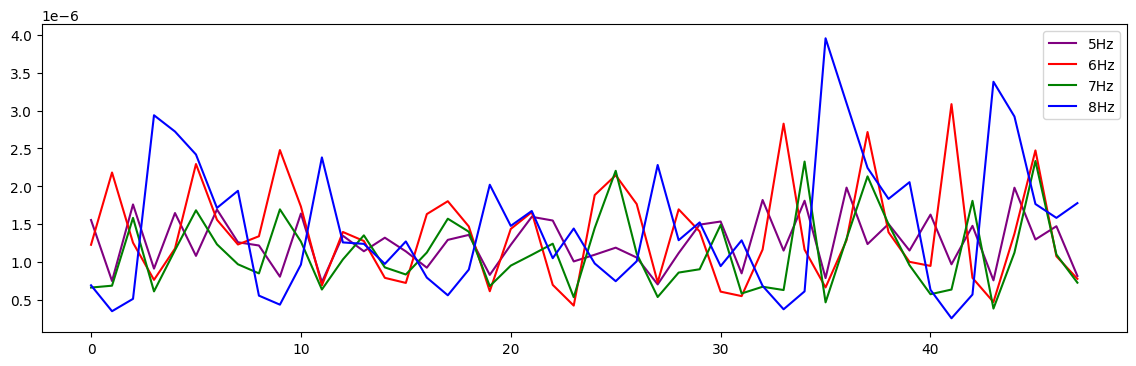

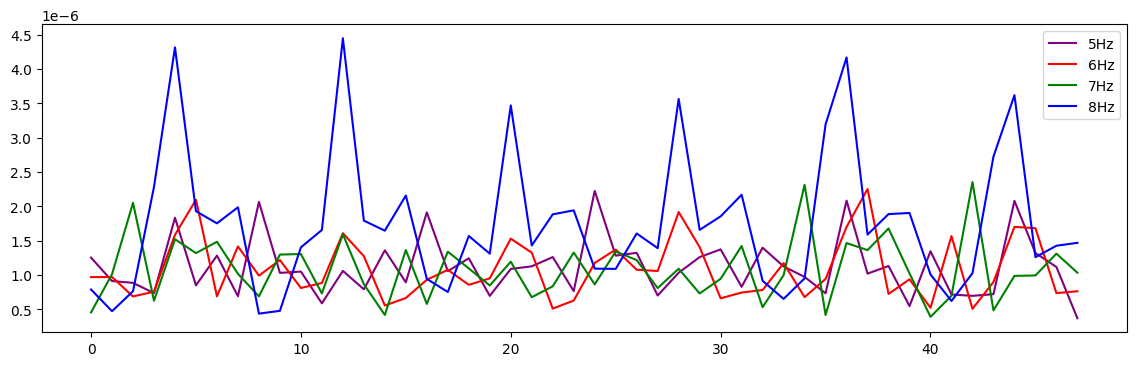

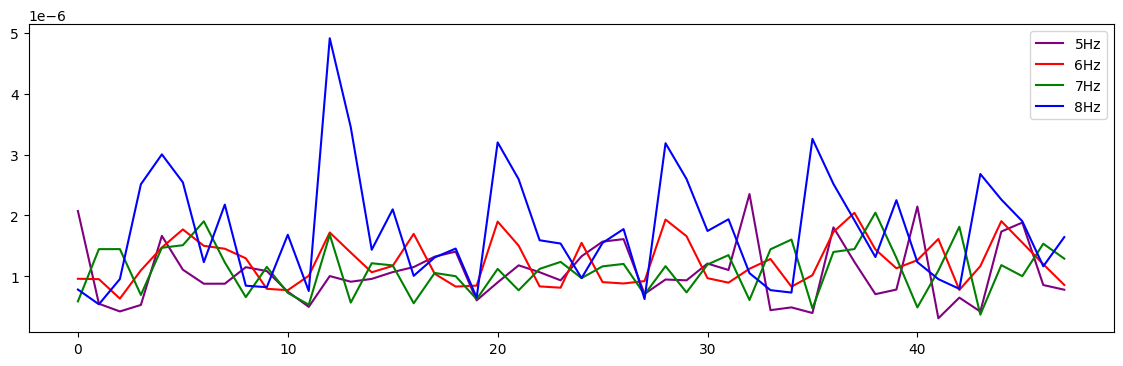

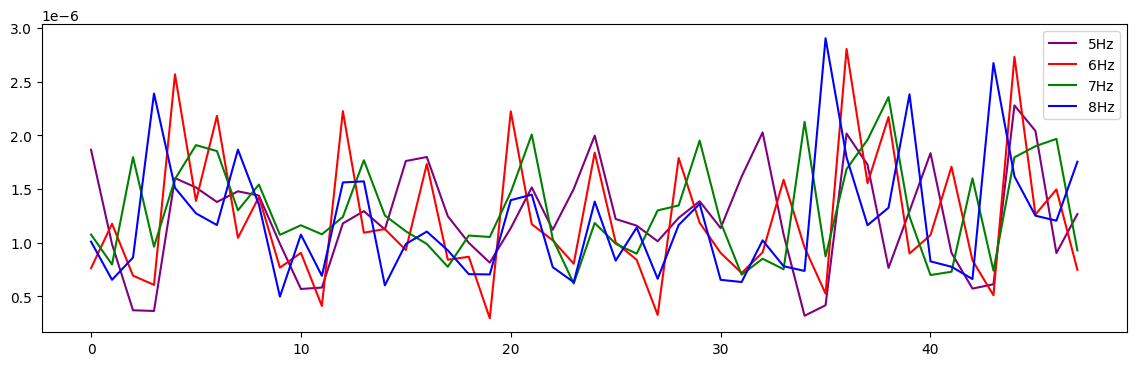

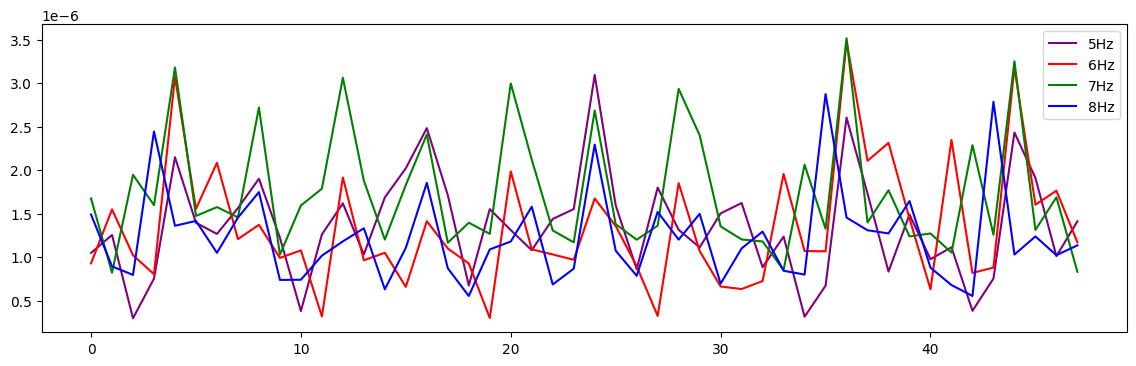

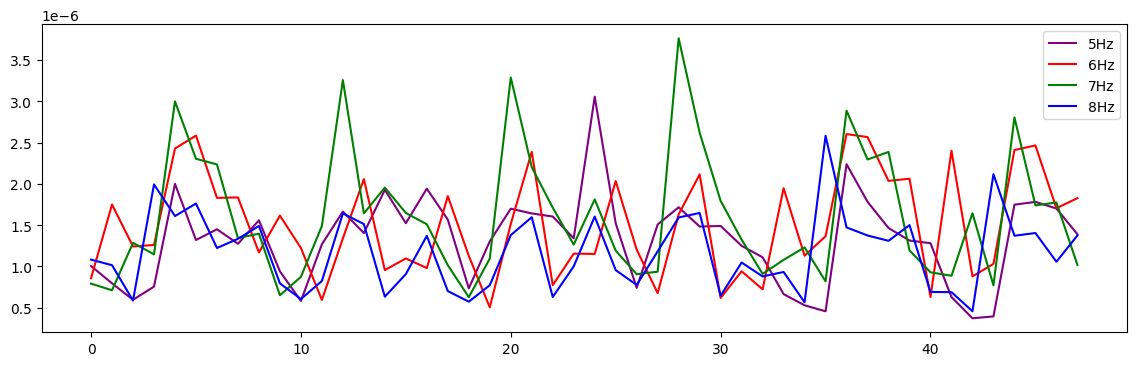

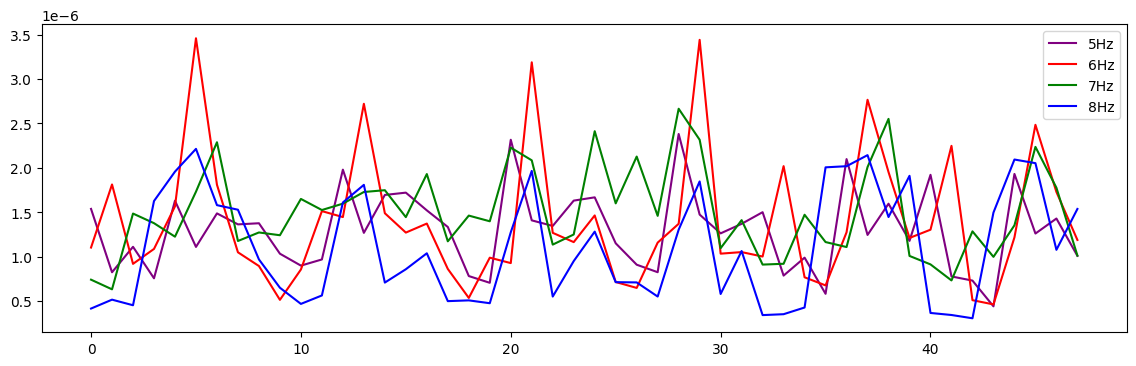

In [8]:
for i in range(50):
    #if Y[i][0] == 1:
        #frequency = 5
    #elif Y[i][1] == 1:
        #frequency == 6
    #elif Y[i][2] == 1:
        #frequency = 7
    #else :
        #frequency = 8
    plt.figure(figsize=(14,4))
    plt.plot(x_hat,x[i], 'purple',label = '5Hz' )
    plt.plot(x_hat, x[i+50], 'red', label = '6Hz')
    plt.plot(x_hat, x[i+100], 'green', label = '7Hz')
    plt.plot(x_hat, x[i+150], 'blue', label = '8Hz')
    plt.legend()
    #plt.title(f'The Frequency is {frequency} Hz')
    plt.show
#plt.plot(x_hat,x[1])
#plt.show

In [37]:
# Save input and output matrices
np.save('ANN_BCI_dataset.npy', x)
np.save('ANN_BCI_output.npy', Y)


In [38]:
# Define and train the neural network
clf = MLPClassifier(hidden_layer_sizes=(40,), max_iter=1000)
clf.fit(x, Y)


MLPClassifier(hidden_layer_sizes=(40,), max_iter=1000)

In [39]:
Y_hat = clf.predict(x)

In [40]:
Y_hat

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0,

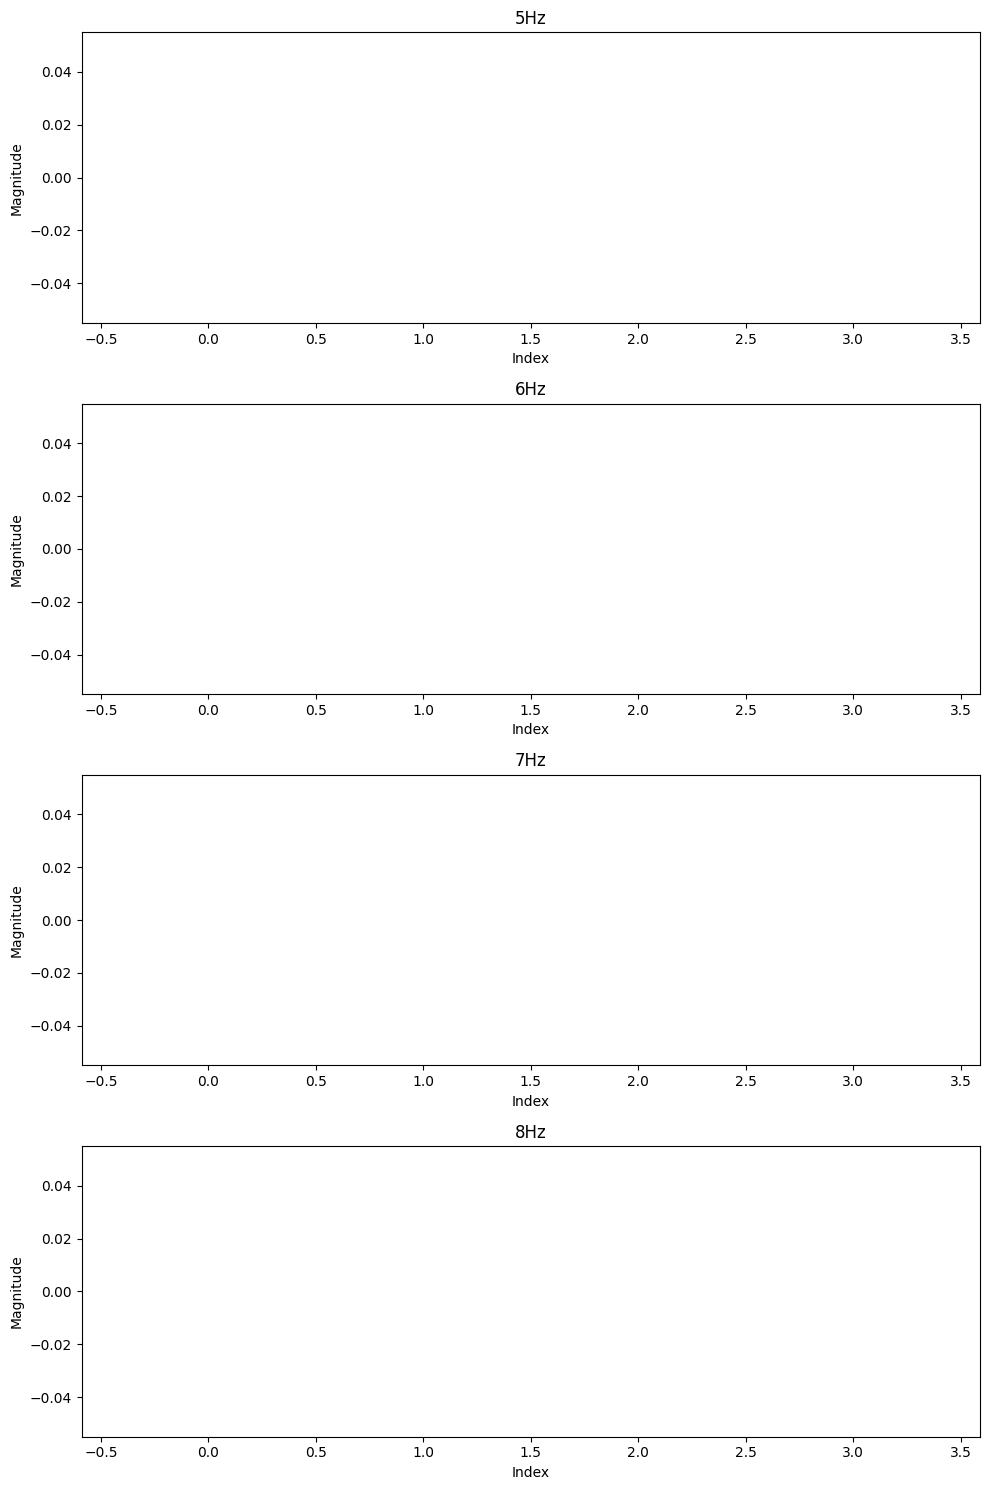

In [22]:
# Visualize the results
fig, axs = plt.subplots(4, 1, figsize=(10, 15))

for i, ax in enumerate(axs):
    ax.bar(range(Y_hat.shape[1]), Y_hat[i, :])
    ax.set_title(f"{5 + i}Hz")
    ax.set_xlabel('Index')
    ax.set_ylabel('Magnitude')

plt.tight_layout()
plt.show()
